# Data Exploration

In order to explore my data, I plan to use summary statistics, a variety of graph types including a word cloud, bar graphs, line graphs, pie charts, etc. I hope that through this exploration I can learn more about my data and the relationships that exist within it.

## Text Data 

### News API

In [3]:
import pandas as pd 

file_path = "../../../../data/01-modified-data/cleaned.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,source,author,publish_date,combined
0,cnet,adam oram,2023-09-30T12:02:09Z,man united vs crystal palace livestream: how t...
1,cnet,adam oram,2023-09-23T12:00:09Z,man city vs nottingham forest livestream: how ...
2,huffpost,ap,2023-09-19T11:28:10Z,spanish soccer star accuses federation of thre...
3,slate magazine,josh levin and stefan fatsis,2023-09-18T21:43:37Z,is there any part of aaron rodgers first game ...
4,deadspin,sam fels,2023-10-03T11:27:00Z,mls is playing pretty fast and loose with lion...


#### Stop Word Removal

In [10]:
all_text = ""
for row in df["combined"]:
    all_text = all_text + " " + row 

all_text = " ".join(list(df["combined"].values))

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words = all_text.split()

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

filtered_text = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reneedemaio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Word Cloud 

[Insert why I chose this]

In [5]:
def generate_word_cloud(my_text): 
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud)
        plt.axis("off");

    wordcloud = WordCloud(
        width = 3000, 
        height = 2000,
        random_state=1, 
        background_color='lavender',
        colormap= "rainbow",
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

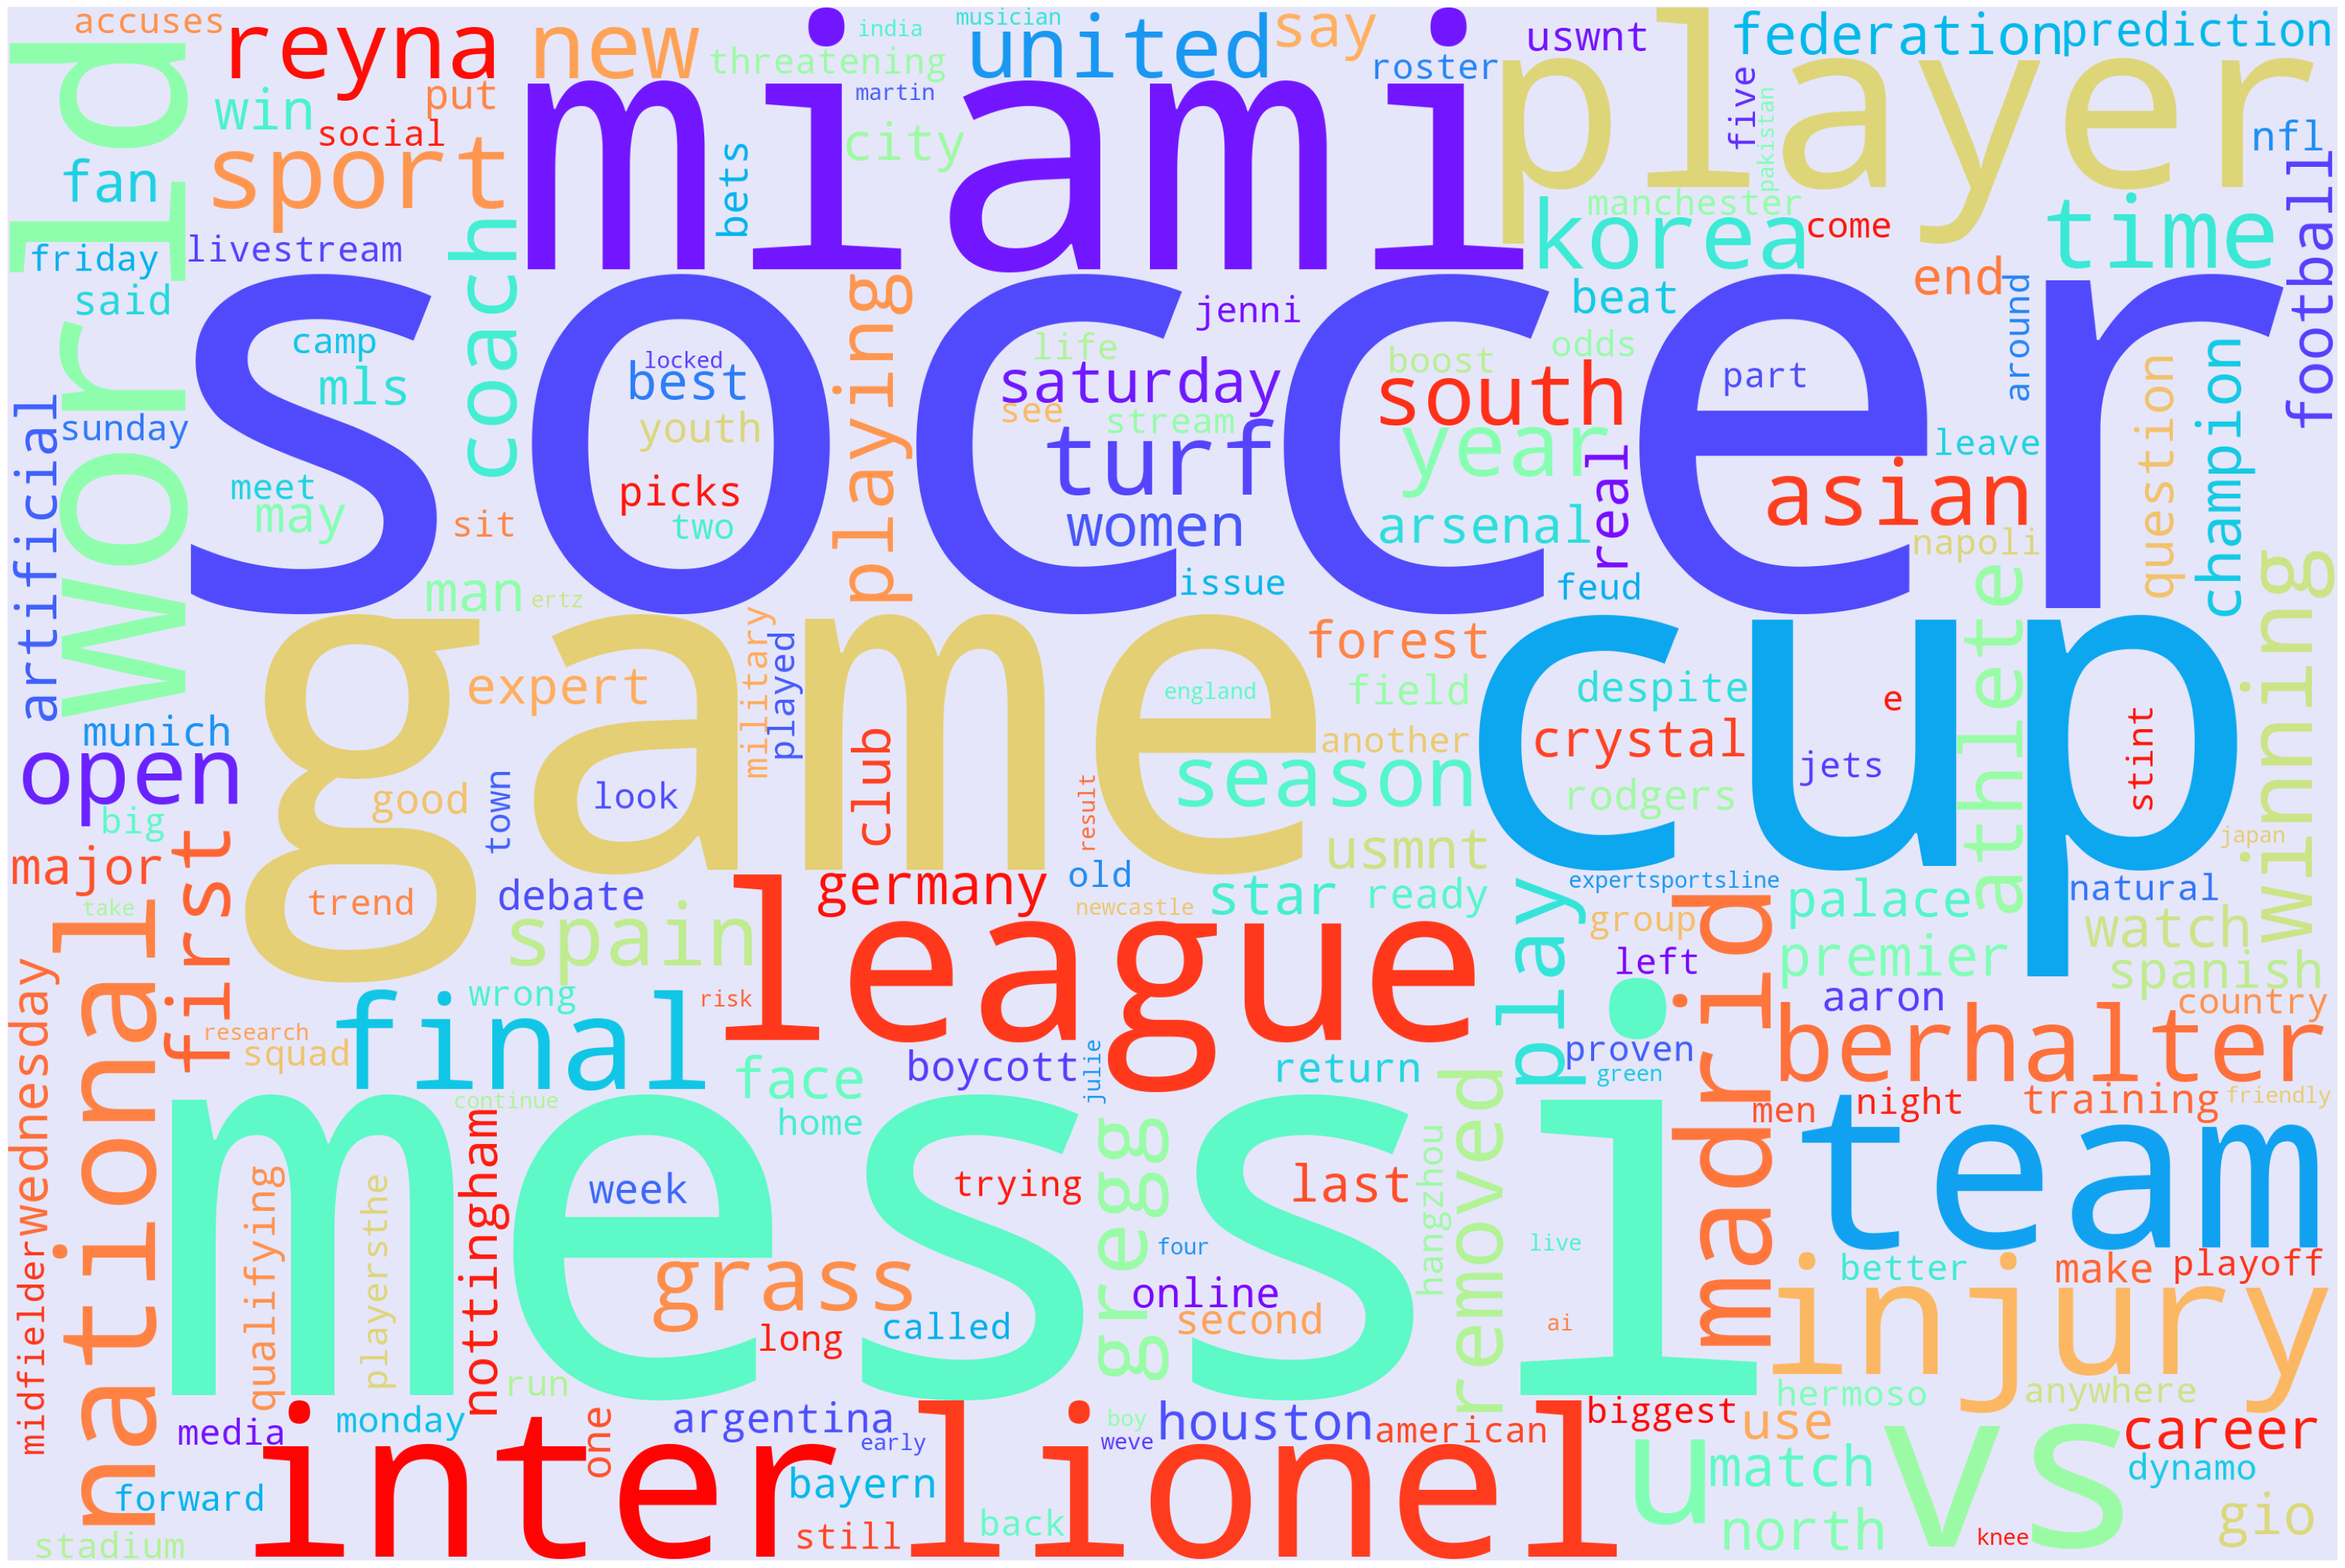

In [13]:
generate_word_cloud(filtered_text)

#### Bar Chart 

In [17]:
from collections import Counter

words = filtered_text.split()
word_freq = Counter(words)

<function matplotlib.pyplot.show(close=None, block=None)>

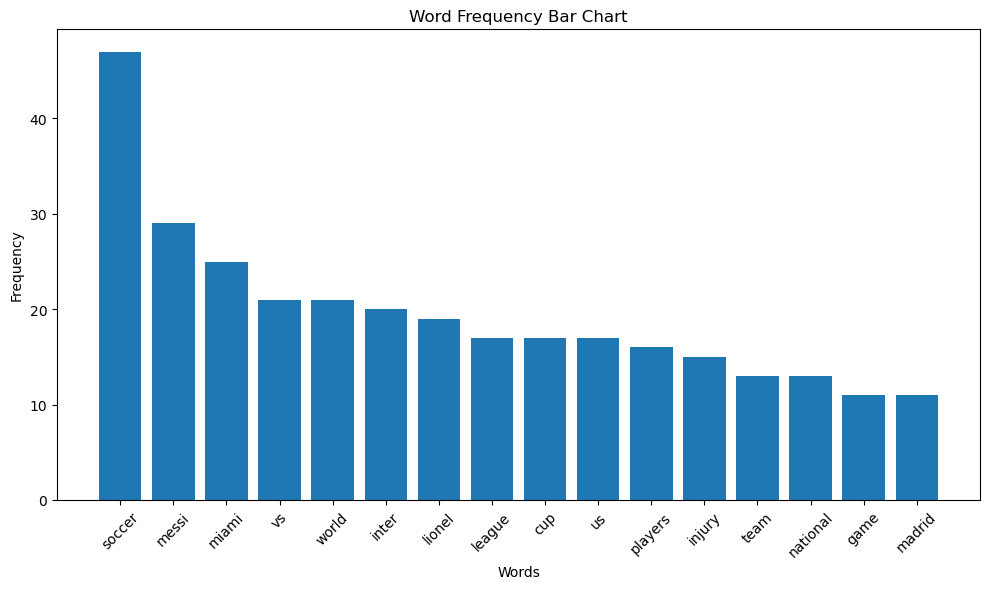

In [19]:
import matplotlib.pyplot as plt

frequency_threshold = 10

common_words = [(word, freq) for word, freq in word_freq.items() if freq > frequency_threshold]
common_words.sort(key=lambda x: x[1], reverse=True)

words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Bar Chart")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

In [ ]:
most_common_words = word_freq.most_common(10)  

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Chart')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

The data exploration for this data was successful and revealed that the majority of the topics discussed in the news relating to soccer are about specific players or competitions, and less about injuries. While some information of injuries are present, based on the lack of words that could relate to discussion of injury, it appears that these mentions are surface level.

## Tabular Data

### Basketball Injury Data

[Why I chose this]

In [22]:
import pandas as pd 
import numpy as np
import gdown

# the csv url is: https://drive.google.com/file/d/1tdKeSFi492daHWh8Laqb7e3_68o3kaqD/view?usp=share_link
file_id = "1tdKeSFi492daHWh8Laqb7e3_68o3kaqD"
url = f"https://drive.google.com/uc?id={file_id}"
output = "basketball_injuries.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1tdKeSFi492daHWh8Laqb7e3_68o3kaqD
To: /Users/reneedemaio/Desktop/git_repo/dsan-5000-project-rennyd123/dsan-website/5000-website/tabs/eda/basketball_injuries.csv
100%|██████████| 1.57M/1.57M [00:00<00:00, 5.38MB/s]


'basketball_injuries.csv'

In [24]:
file_path = "../../../../data/01-modified-data/basketball_injury_data.csv"

bball_injury_data = pd.read_csv(file_path)
print(bball_injury_data.head())

         Date     Team   Relinquished  \
0  2010-10-03    Bulls  Carlos Boozer   
1  2010-10-06  Pistons  Jonas Jerebko   
2  2010-10-06  Pistons  Terrico White   
3  2010-10-08  Blazers     Jeff Ayres   
4  2010-10-08     Nets    Troy Murphy   

                                               Notes      InjuryStatus  
0  fractured bone in right pinky finger (out inde...  out indefinitely  
1      torn right Achilles tendon (out indefinitely)  out indefinitely  
2  broken fifth metatarsal in right foot (out ind...  out indefinitely  
3          torn ACL in right knee (out indefinitely)  out indefinitely  
4             strained lower back (out indefinitely)  out indefinitely  


#### Injury Status Bar Chart

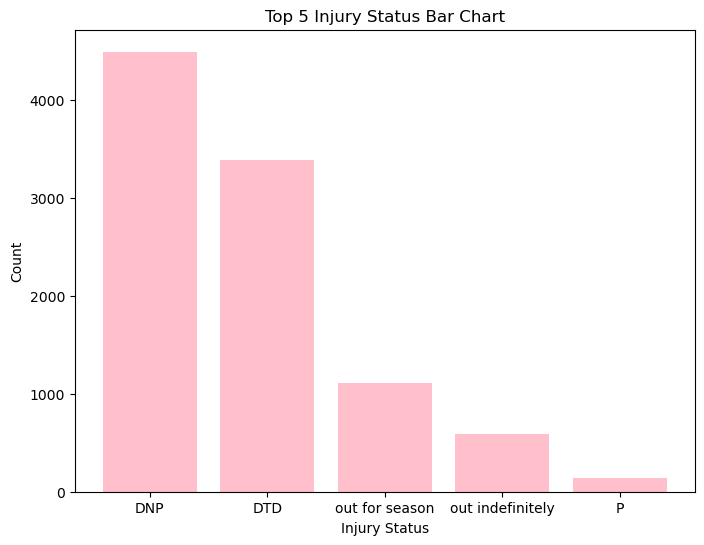

In [28]:
import matplotlib.pyplot as plt

injury_counts = bball_injury_data["InjuryStatus"].value_counts()

top_5_injury_counts = injury_counts.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_injury_counts.index, top_5_injury_counts.values, color='pink')
plt.xlabel('Injury Status')
plt.ylabel('Count')
plt.title('Top 5 Injury Status Bar Chart')

plt.show()

#### Injuries Per Team 

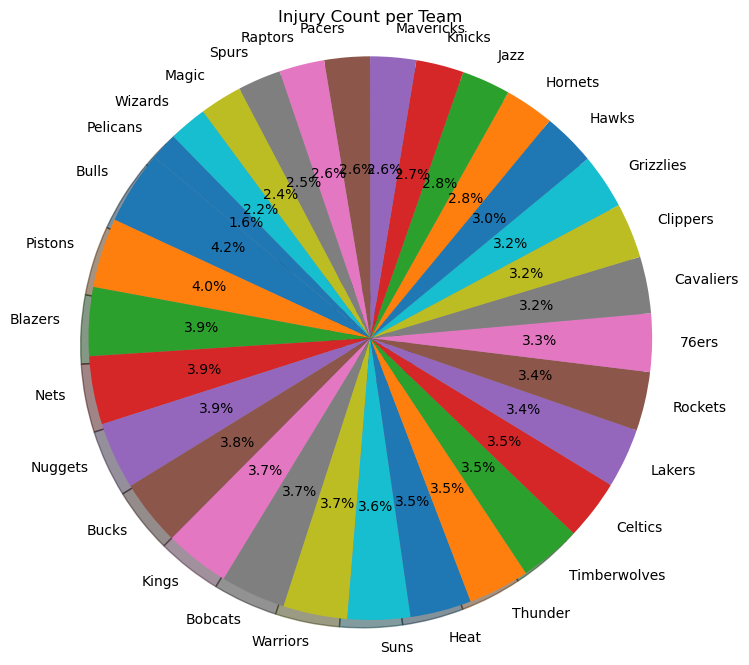

In [32]:
team_counts = bball_injury_data["Team"].value_counts()
team_names = bball_injury_data["Team"].unique()

plt.figure(figsize=(8, 8))
plt.pie(team_counts, labels=team_names, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis("equal")
plt.title("Injury Count per Team")
plt.show()


#### Injuries by Dates

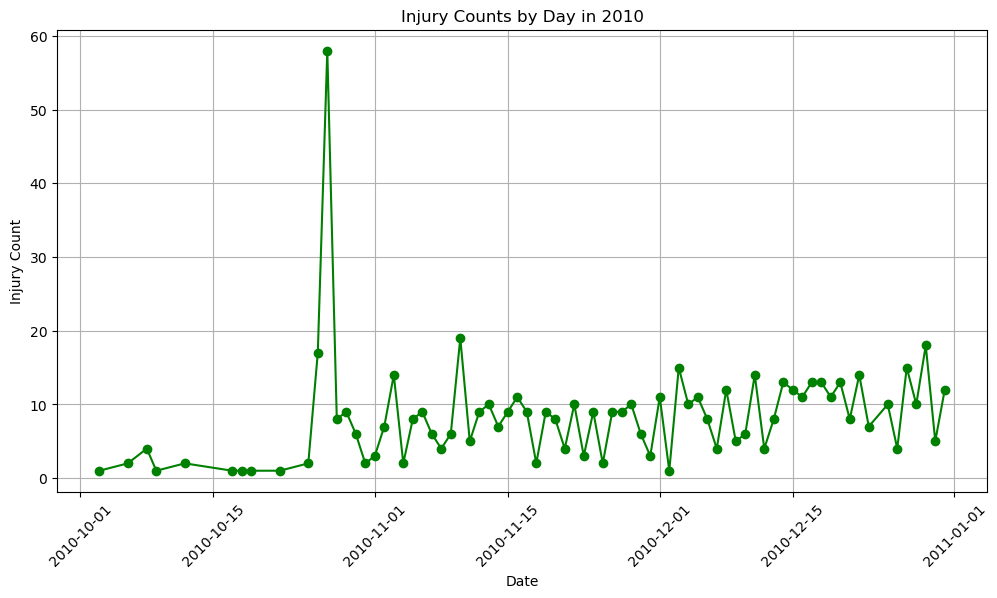

In [37]:
bball_injury_data['Date'] = pd.to_datetime(bball_injury_data['Date'])
date_counts_2010 = bball_injury_data[bball_injury_data['Date'].dt.year == 2010]
date_counts_2010 = date_counts_2010['Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(date_counts_2010.index, date_counts_2010.values, marker='o', linestyle='-', color="green")
plt.xlabel("Date")
plt.ylabel("Injury Count")
plt.title("Injury Counts by Day in 2010")
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

[Explore findings]

### NFL Concussion Data 

In [4]:
file_path = "../../../../data/01-modified-data/nfl_concussions.csv"

concussion_data = pd.read_csv(file_path)
print(concussion_data.head())

             Player                  Team        Date         Opposing Team  \
0  Aldrick Robinson   Washington Redskins  30/09/2012  Tampa Bay Buccaneers   
1       D.J. Fluker    San Diego Chargers  22/09/2013      Tennessee Titans   
2  Marquise Goodwin         Buffalo Bills  28/09/2014        Houston Texans   
3       Bryan Stork  New England Patriots  12/10/2014         Buffalo Bills   
4    Lorenzo Booker         Chicago Bears   9/09/2012    Indianapolis Colts   

           Position Pre-Season Injury? Winning Team?  Week of Injury  \
0     Wide Receiver                 No           Yes               4   
1  Offensive Tackle                 No            No               3   
2     Wide Receiver                 No            No               4   
3            Center                 No           Yes               6   
4      Running Back                Yes           Yes               1   

      Season  Weeks Injured  Games Missed Unknown Injury?  \
0  2012/2013              1    

#### Injury Count by Team 

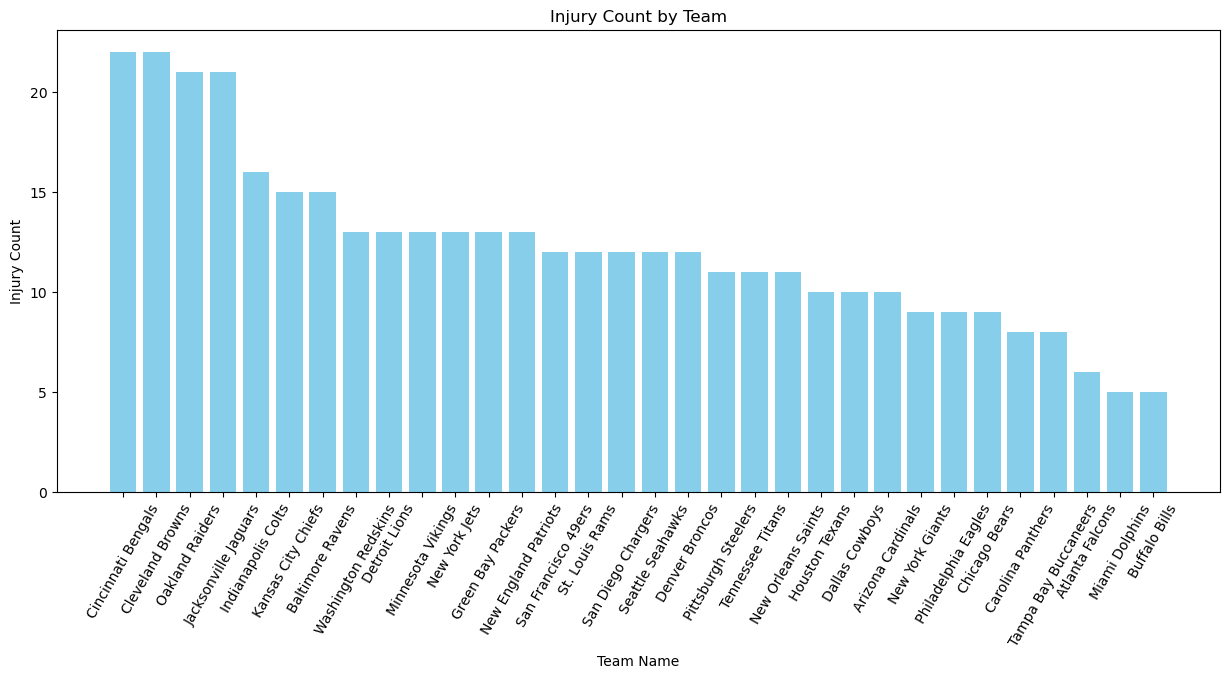

In [5]:
injuries_by_team = concussion_data['Team'].value_counts()

 
plt.figure(figsize=(15, 6))
plt.bar(injuries_by_team.index, injuries_by_team.values, color="skyblue")
plt.xlabel("Team Name")
plt.ylabel("Injury Count")
plt.title("Injury Count by Team")
plt.xticks(rotation=60)

plt.show()

#### Type of Injury

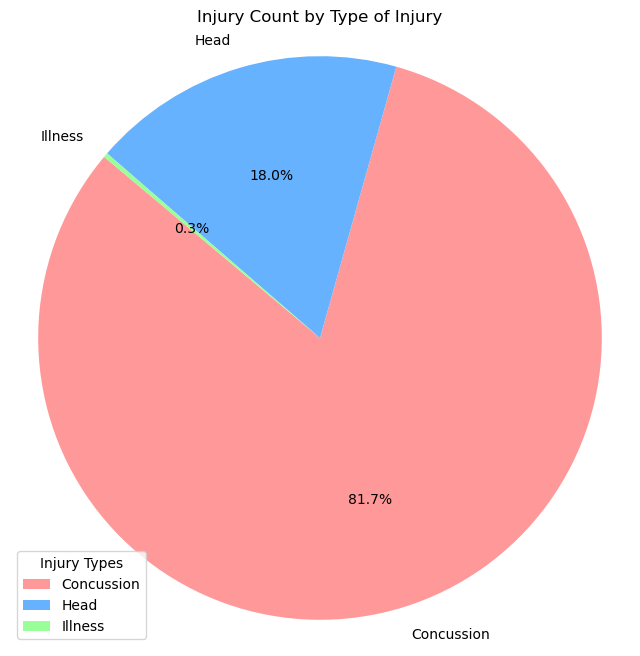

In [6]:
injury_type = concussion_data["Reported Injury Type"].value_counts()
injury_name = injury_type.index

pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 8))
plt.pie(injury_type, labels=injury_name, autopct='%1.1f%%', startangle=140, shadow=False, colors=pastel_colors)
plt.axis("equal")
plt.title("Injury Count by Type of Injury")
plt.legend(injury_name, title="Injury Types", loc="best")
plt.show()

#### Injuries by Position

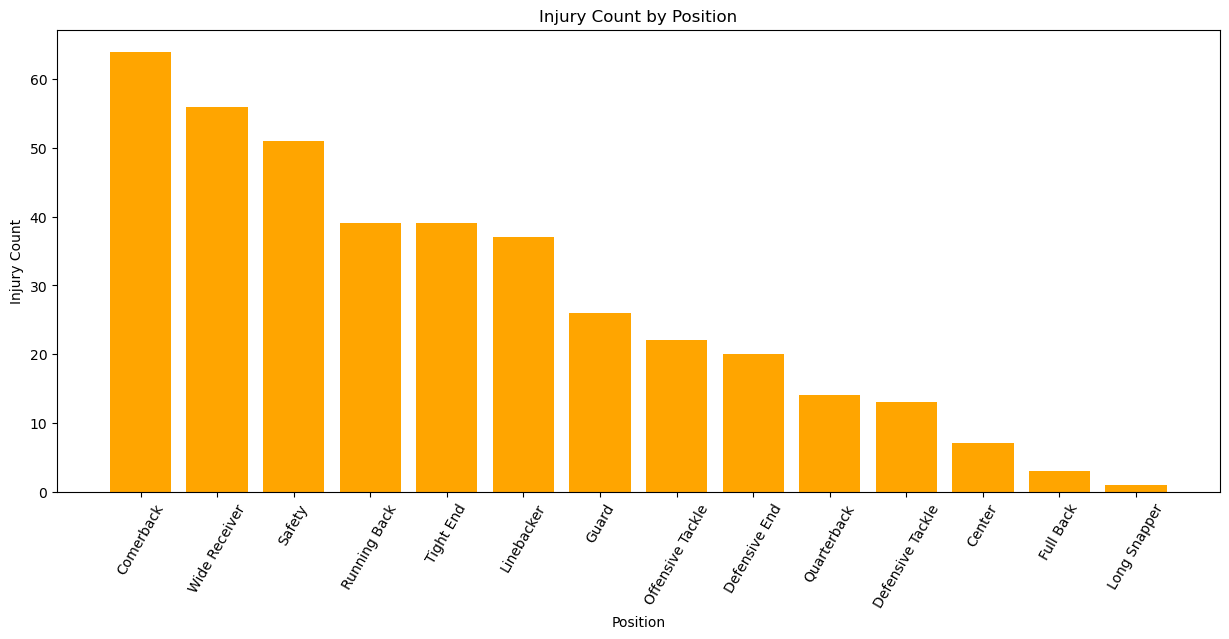

In [49]:
injuries_by_pos = concussion_data['Position'].value_counts()

 
plt.figure(figsize=(15, 6))
plt.bar(injuries_by_pos.index, injuries_by_pos.values, color="orange")
plt.xlabel("Position")
plt.ylabel("Injury Count")
plt.title("Injury Count by Position")
plt.xticks(rotation=60)

plt.show()

#### Correlation Between Week of Injury and Total Snaps

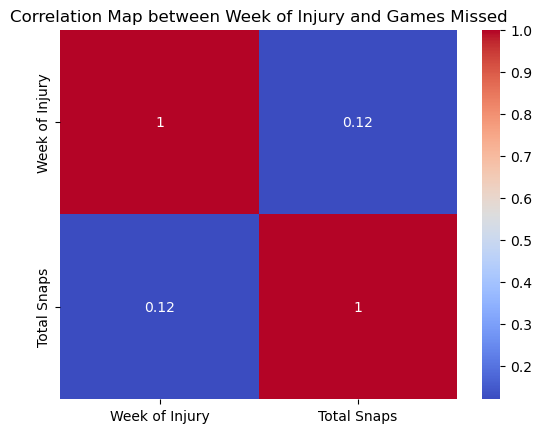

In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


subset = ["Week of Injury", "Total Snaps"]
concussion_data_subset = concussion_data[subset]

corr_matrix = concussion_data_subset.corr()

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm")
plt.title("Correlation Map between Week of Injury and Total Snaps")
plt.show()

[Explore findings]

### NFL Game Injury Data

In [75]:
file_path = "../../../../data/01-modified-data/nfl_injuries.csv"

nfl_injuries = pd.read_csv(file_path)
print(nfl_injuries.head())

   PlayerKey BodyPart RosterPosition       StadiumType  FieldType  \
0      39873     Knee     Linebacker            indoor  Synthetic   
1      39873     Knee     Linebacker           outdoor    Natural   
2      39873     Knee     Linebacker            indoor  Synthetic   
3      39873     Knee     Linebacker  retractable roof  Synthetic   
4      39873     Knee     Linebacker           outdoor    Natural   

   Temperature        Weather  
0           85  Mostly Cloudy  
1           82          Sunny  
2           84         Cloudy  
3           78  Partly Cloudy  
4           80         Cloudy  


##### Injury Count by Stadium Type

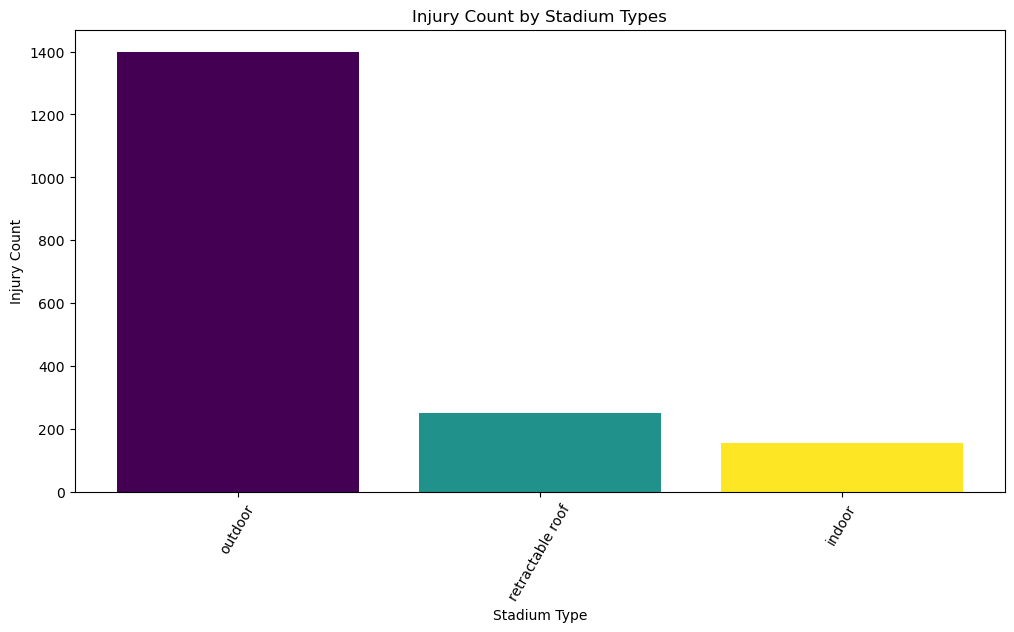

In [65]:
stadium_type = nfl_injuries["StadiumType"].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(stadium_type)))


plt.figure(figsize=(12,6))
plt.bar(stadium_type.index, stadium_type.values, color=colors)
plt.xlabel("Stadium Type")
plt.ylabel("Injury Count")
plt.title("Injury Count by Stadium Types")
plt.xticks(rotation = 60)
plt.show()

##### Injury Count by Body Part Injured

BodyPart
Knee     825
Ankle    720
Toes     144
Foot      96
Heel      18
Name: count, dtype: int64


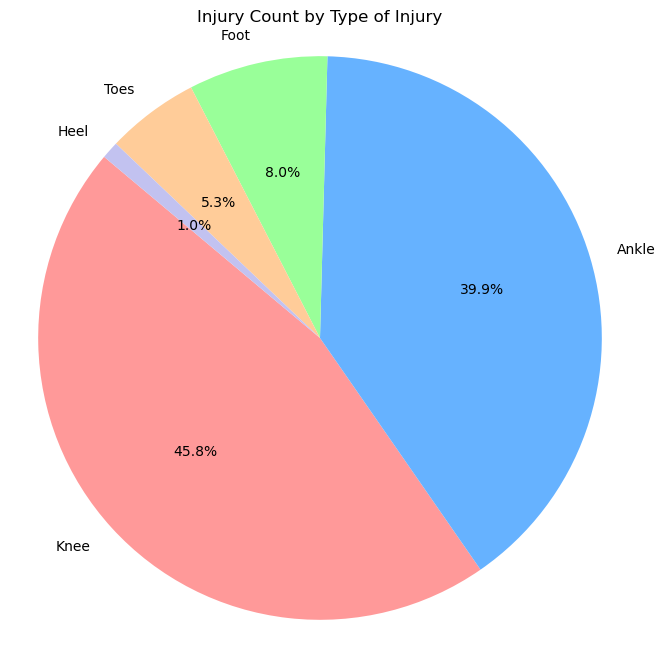

In [82]:
import seaborn as sns

injury_frequency = nfl_injuries["BodyPart"].value_counts()
injury_place = nfl_injuries["BodyPart"].unique()
print(injury_frequency)

pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 8))
plt.pie(injury_frequency, labels=injury_place, autopct='%1.1f%%', startangle=140, shadow=False, colors=pastel_colors)
plt.axis("equal")
plt.title("Injury Count by Type of Injury")
plt.show()

##### Injury Count vs Temperature

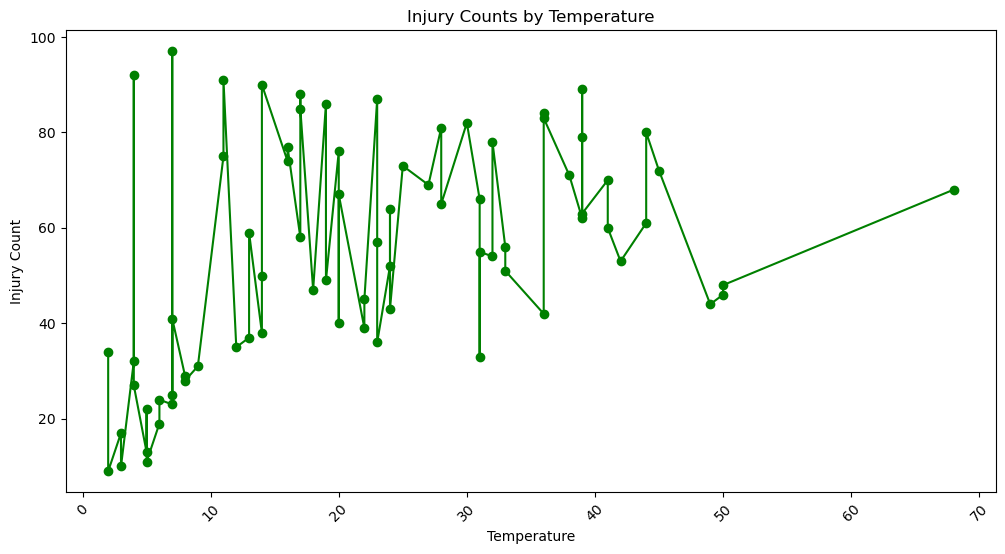

In [89]:
nfl_injuries["Temperature"] = pd.to_numeric(nfl_injuries["Temperature"], errors='coerce')
nfl_injuries = nfl_injuries[nfl_injuries["Temperature"] >= 0]
nfl_injuries = nfl_injuries.dropna(subset=["Temperature"])

temperature_counts = nfl_injuries["Temperature"].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(temperature_counts.values, temperature_counts.index, marker='o', linestyle='-', color="green")
plt.xlabel("Temperature")
plt.ylabel("Injury Count")
plt.title("Injury Counts by Temperature")
plt.xticks(rotation=45)
plt.show()

[Explore findings]

### Injury Prevention Data Soccer

In [90]:
file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"

injury_prevention = pd.read_csv(file_path)
print(injury_prevention.head())

    ID  Age  Height  Mass  Team  Position  Years of Football Experience  \
0  146   19   173.0  67.6     1         3                             1   
1  155   22   179.5  71.0     1         3                             1   
2  160   22   175.5  71.8     1         3                             1   
3  164   23   190.0  80.5     1         4                             1   
4  145   19   173.5  68.7     1         3                             1   

  Previous Injuries   Number of Injuries Ankle Injuries   ...  \
0                yes                   6             yes  ...   
1                yes                   2              no  ...   
2                yes                   7             yes  ...   
3                yes                   1              no  ...   
4                yes                   2             yes  ...   

   Importance Injury Prevention Knowledgeability   \
0                             2                 1   
1                             1                 1   

##### Summary Statistics on Personal Information 

In [96]:
injury_prevention.columns
print(injury_prevention.dtypes)


ID                                                   int64
Age                                                  int64
Height                                             float64
Mass                                               float64
Team                                                 int64
Position                                             int64
Years of Football Experience                         int64
Previous Injuries                                   object
Number of Injuries                                   int64
Ankle Injuries                                      object
Number of Ankle Injuries                             int64
Severe_Ankle_Injuries                               object
Noncontact_Ankle_Injuries                           object
Knee Injuries                                       object
Number of Knee Injuries                              int64
Severe_Knee_Injuries                                object
Noncontact_Knee_Injuries                            obje

In [97]:
injury_prevention["Height"] = injury_prevention["Height"].astype(int)
injury_prevention["Mass"] = injury_prevention["Mass"].astype(int)

In [99]:
print(injury_prevention.dtypes)

ID                                                  int64
Age                                                 int64
Height                                              int64
Mass                                                int64
Team                                                int64
Position                                            int64
Years of Football Experience                        int64
Previous Injuries                                  object
Number of Injuries                                  int64
Ankle Injuries                                     object
Number of Ankle Injuries                            int64
Severe_Ankle_Injuries                              object
Noncontact_Ankle_Injuries                          object
Knee Injuries                                      object
Number of Knee Injuries                             int64
Severe_Knee_Injuries                               object
Noncontact_Knee_Injuries                           object
Thigh_Injuries

In [102]:
numerical_columns = injury_prevention.select_dtypes(include='int64')
numerical_columns = injury_prevention.drop(columns="ID")
numerical_columns.describe()

,Age,Height,Mass,Team,Position,Years of Football Experience,Number of Injuries,Number of Ankle Injuries,Number of Knee Injuries,Number of Thigh Injuries,Importance Injury Prevention,Knowledgeability
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,17.597122,177.043165,68.417266,3.690647,2.546763,1.733813,1.906475,0.683453,0.517986,0.726619,1.345324,0.827338
std,4.601070,9.416198,11.781156,1.825142,0.853153,0.913470,1.614661,0.932784,0.684746,0.778383,0.586221,0.415777
min,13.000000,141.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,172.500000,61.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,16.000000,178.000000,70.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,19.000000,184.000000,76.000000,5.500000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,35.000000,196.000000,101.000000,6.000000,4.000000,4.000000,10.000000,4.000000,3.000000,3.000000,4.000000,2.000000


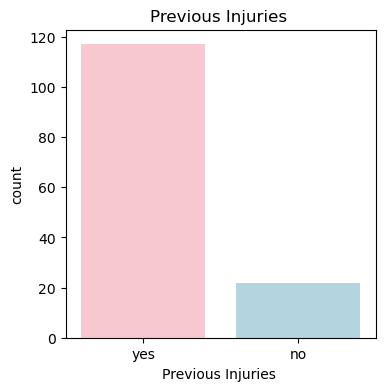

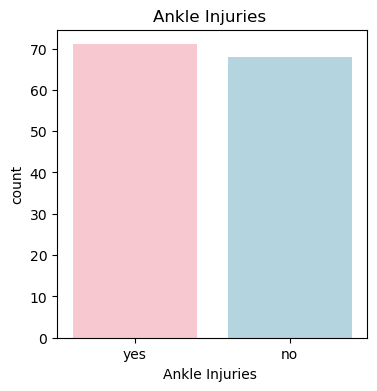

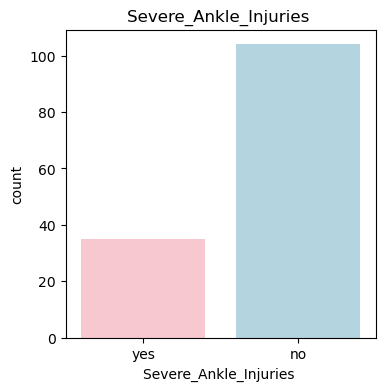

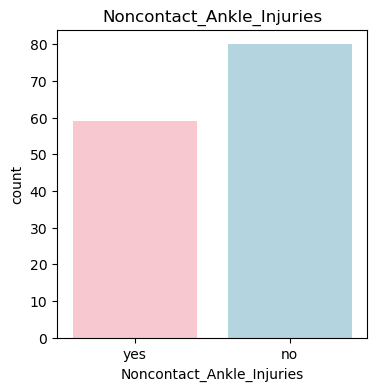

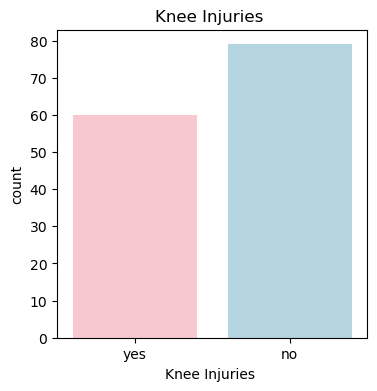

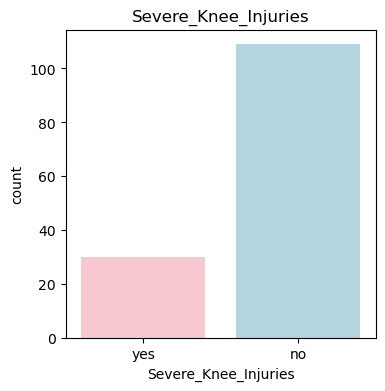

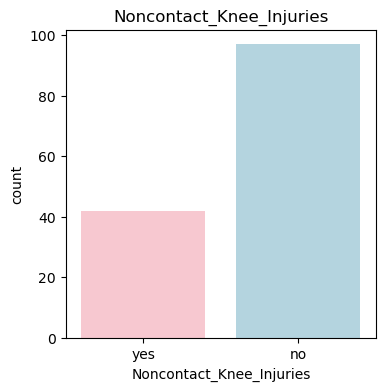

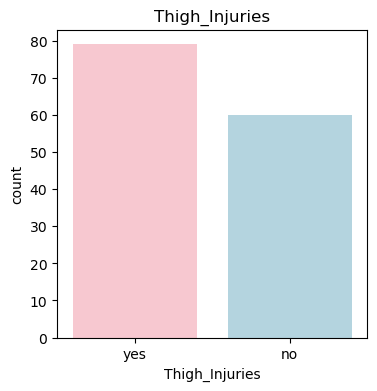

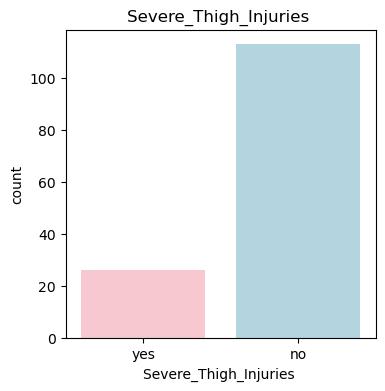

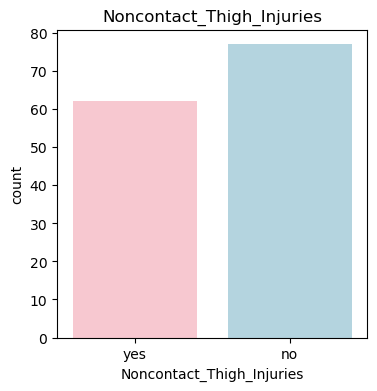

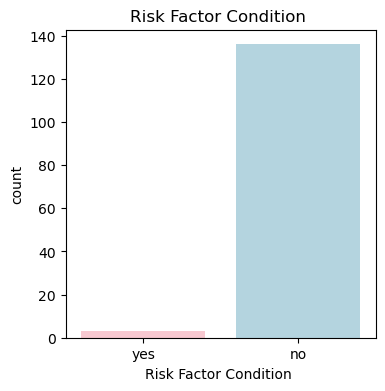

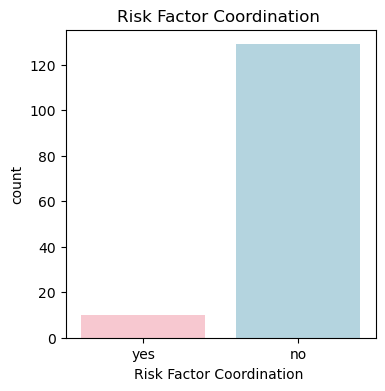

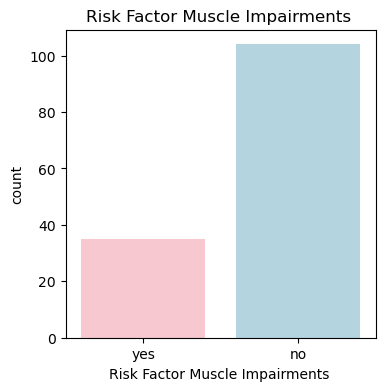

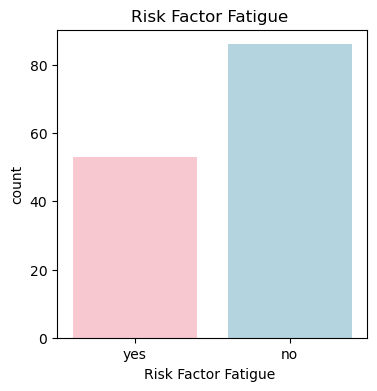

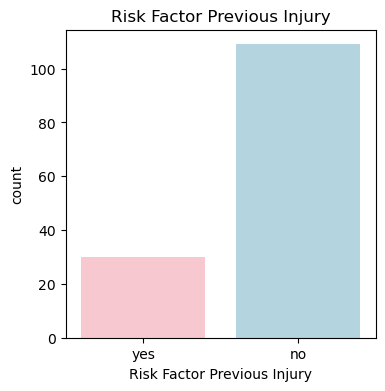

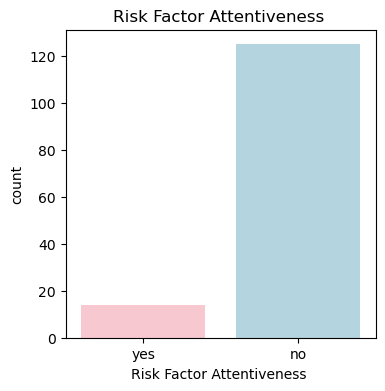

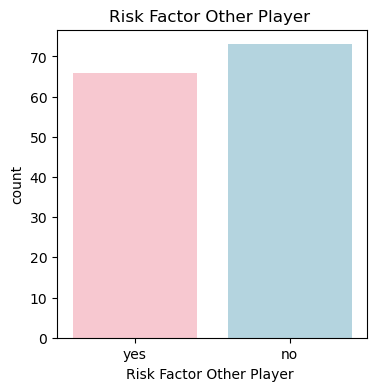

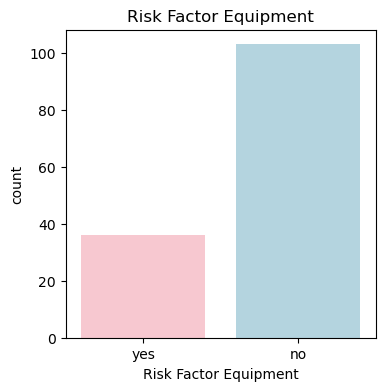

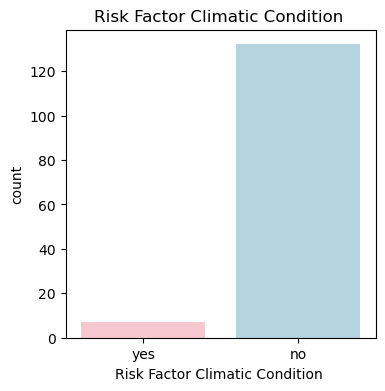

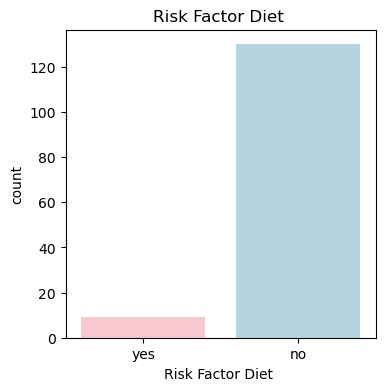

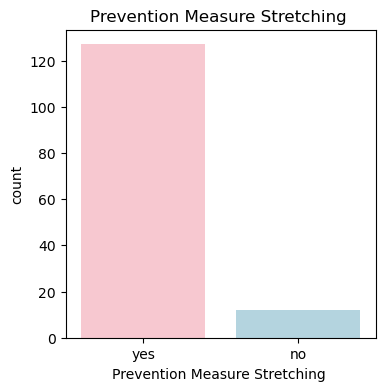

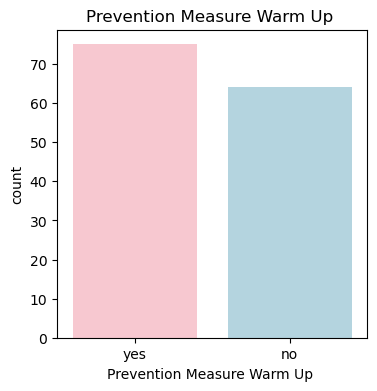

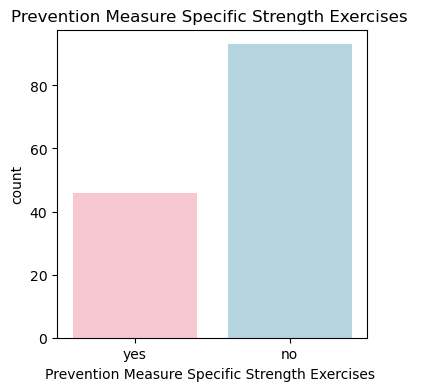

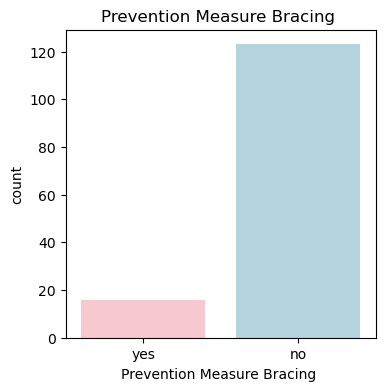

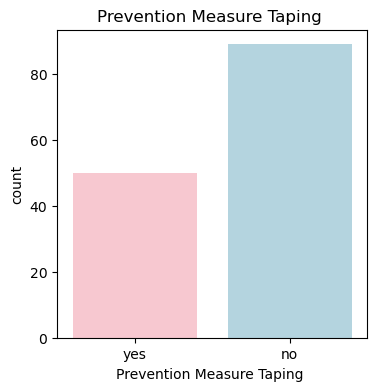

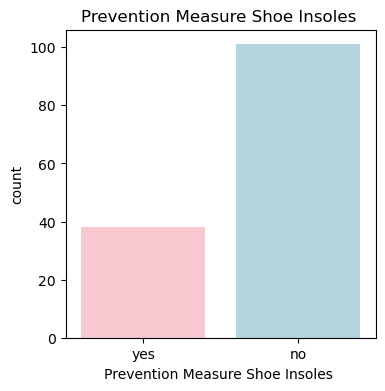

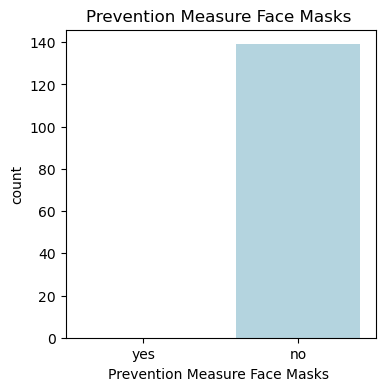

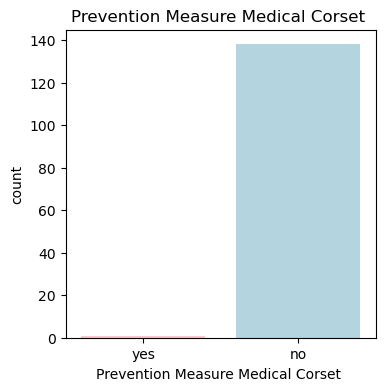

In [112]:
object_columns = injury_prevention.select_dtypes(include='object')
for column in object_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=injury_prevention, x=column, order=['yes', 'no'], palette=['pink', 'lightblue'])
    plt.title(f'{column}')
    plt.show()


[Explore findings]

### Sports Injury Data

In [128]:
file_path = "../../../../data/01-modified-data/sports_injury_data.csv"

sports_injuries = pd.read_csv(file_path)
print(sports_injuries.head())

     Sport, activity or equipment Injuries (1) Younger than 5  5 to 14  \
0    Exercise, exercise equipment      445,642          6,662   36,769   
1        Bicycles and accessories      405,411         13,297   91,089   
2                      Basketball      313,924          1,216  109,696   
3                        Football      265,747            581  145,499   
4  ATV's, mopeds, minibikes, etc.      242,347          3,688   42,069   

  15 to 24 25 to 64 65 and older  
0   91,013  229,640       81,558  
1   50,863  195,030       55,132  
2  143,773   57,413        1,825  
3  100,760   18,527          381  
4   61,065  122,941       12,584  


In [129]:
sports_injuries_subset = sports_injuries[['Injuries (1)', 'Younger than 5',
       '5 to 14', '15 to 24', '25 to 64', '65 and older']]
activity_type = sports_injuries["Sport, activity or equipment"]

In [130]:
sports_injuries.dtypes

Sport, activity or equipment    object
Injuries (1)                    object
Younger than 5                  object
5 to 14                         object
15 to 24                        object
25 to 64                        object
65 and older                    object
dtype: object

In [134]:
sports_injuries["Injuries (1)"] = sports_injuries["Injuries (1)"].str.replace(',', '').astype(float)
sports_injuries["Younger than 5"] = sports_injuries["Younger than 5"].str.replace(',', '').astype(float)
sports_injuries["5 to 14"] = sports_injuries["5 to 14"].str.replace(',', '').astype(float)
sports_injuries["15 to 24"] = sports_injuries["15 to 24"].str.replace(',', '').astype(float)
sports_injuries["25 to 64"] = sports_injuries["25 to 64"].str.replace(',', '').astype(float)
sports_injuries["65 and older"] = sports_injuries["65 and older"].str.replace(',', '').astype(float)

In [136]:
print(sports_injuries.head())
print(sports_injuries.dtypes)

     Sport, activity or equipment  Injuries (1)  Younger than 5   5 to 14  \
0    Exercise, exercise equipment      445642.0          6662.0   36769.0   
1        Bicycles and accessories      405411.0         13297.0   91089.0   
2                      Basketball      313924.0          1216.0  109696.0   
3                        Football      265747.0           581.0  145499.0   
4  ATV's, mopeds, minibikes, etc.      242347.0          3688.0   42069.0   

   15 to 24  25 to 64  65 and older  
0   91013.0  229640.0       81558.0  
1   50863.0  195030.0       55132.0  
2  143773.0   57413.0        1825.0  
3  100760.0   18527.0         381.0  
4   61065.0  122941.0       12584.0  
Sport, activity or equipment     object
Injuries (1)                    float64
Younger than 5                  float64
5 to 14                         float64
15 to 24                        float64
25 to 64                        float64
65 and older                    float64
dtype: object


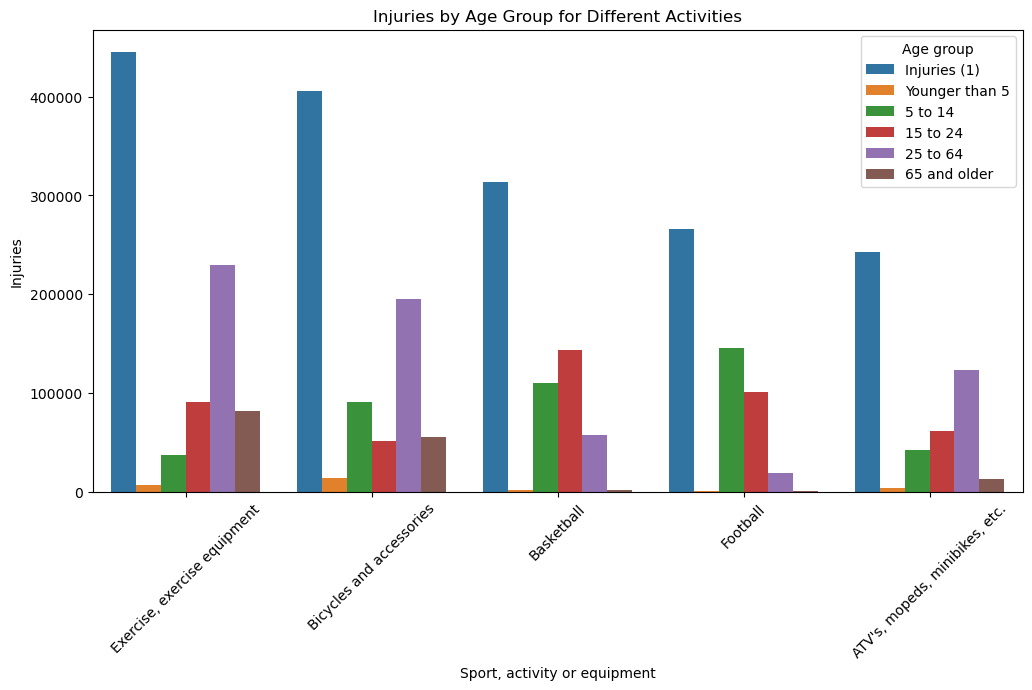

In [138]:
subsetted_sports_injuries = sports_injuries.head(5)
melted_df = pd.melt(subsetted_sports_injuries, id_vars=['Sport, activity or equipment'], var_name='Age group', value_name='Injuries')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Sport, activity or equipment', y='Injuries', hue='Age group')
plt.title('Injuries by Age Group for Different Activities')
plt.xlabel('Sport, activity or equipment')
plt.xticks(rotation=45)
plt.show()

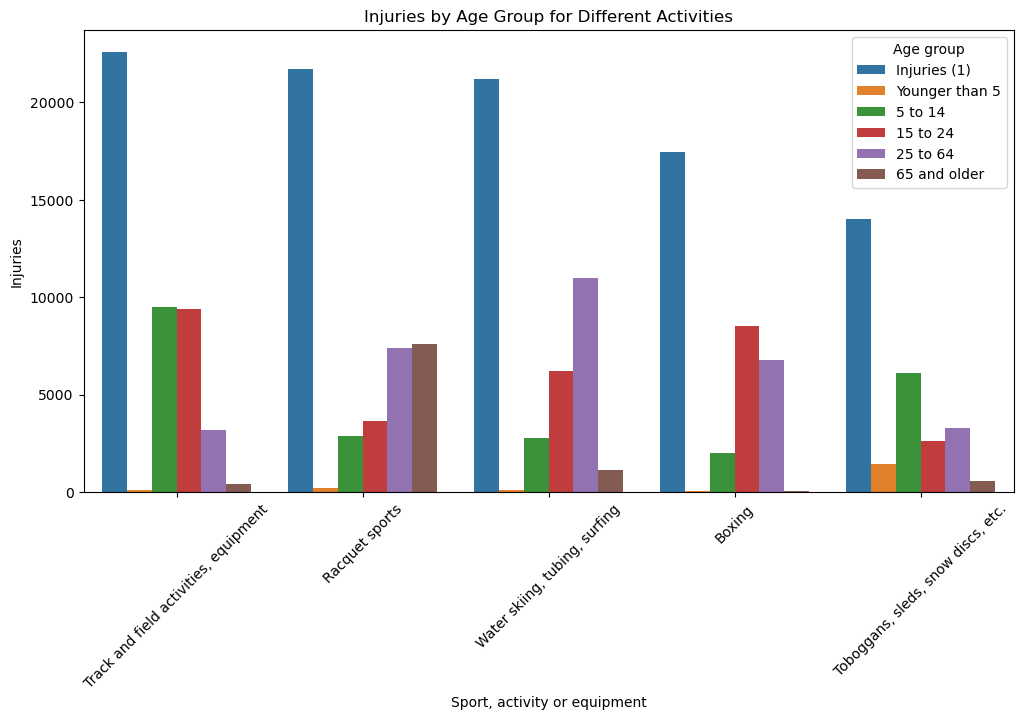

In [139]:
subsetted_sports_injuries = sports_injuries.tail(5)
melted_df = pd.melt(subsetted_sports_injuries, id_vars=['Sport, activity or equipment'], var_name='Age group', value_name='Injuries')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Sport, activity or equipment', y='Injuries', hue='Age group')
plt.title('Injuries by Age Group for Different Activities')
plt.xlabel('Sport, activity or equipment')
plt.xticks(rotation=45)
plt.show()

[Explore findings]

### NBA Player and Team Data

In [144]:
file_path = "../../../../data/01-modified-data/nba_data.csv"

nba = pd.read_csv(file_path)
print(nba.head())

   Unnamed: 0       PLAYER_NAME     TEAM_ID  PLAYER_ID  SEASON  LEAGUE_ID  \
0           1     Royce O'Neale  1610612762    1626220    2019          0   
1           2  Bojan Bogdanovic  1610612762     202711    2019          0   
2           3       Rudy Gobert  1610612762     203497    2019          0   
3           4  Donovan Mitchell  1610612762    1628378    2019          0   
4           5       Mike Conley  1610612762     201144    2019          0   

   MIN_YEAR  MAX_YEAR ABBREVIATION NICKNAME  ...    HEADCOACH  \
0      1974      2019          UTA     Jazz  ...  Quin Snyder   
1      1974      2019          UTA     Jazz  ...  Quin Snyder   
2      1974      2019          UTA     Jazz  ...  Quin Snyder   
3      1974      2019          UTA     Jazz  ...  Quin Snyder   
4      1974      2019          UTA     Jazz  ...  Quin Snyder   

     DLEAGUEAFFILIATION SEASON_ID  STANDINGSDATE CONFERENCE  TEAM   G   W   L  \
0  Salt Lake City Stars     22022     2022-12-22       West  Utah

In [148]:
nba.columns

Index(['Unnamed: 0', 'PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON',
       'LEAGUE_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION', 'NICKNAME',
       'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION', 'SEASON_ID',
       'STANDINGSDATE', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'W_PCT'],
      dtype='object')

#### Win Percentage by Team

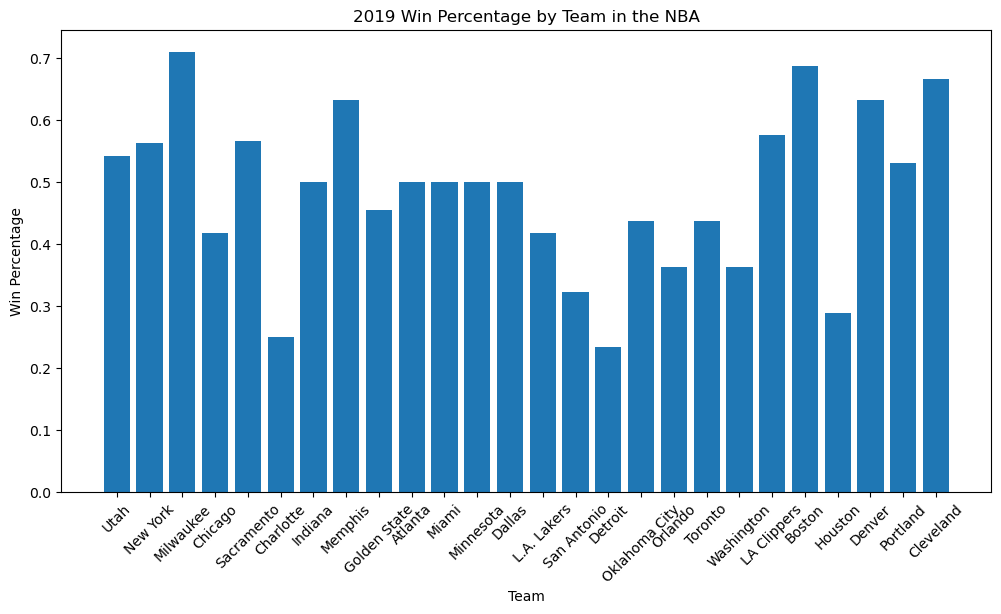

In [147]:
team = nba["TEAM"]
win_pct = nba["W_PCT"]

plt.figure(figsize=(12, 6))
plt.bar(team, win_pct)
plt.title('2019 Win Percentage by Team in the NBA')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()

#### Wins vs Arena Capacity

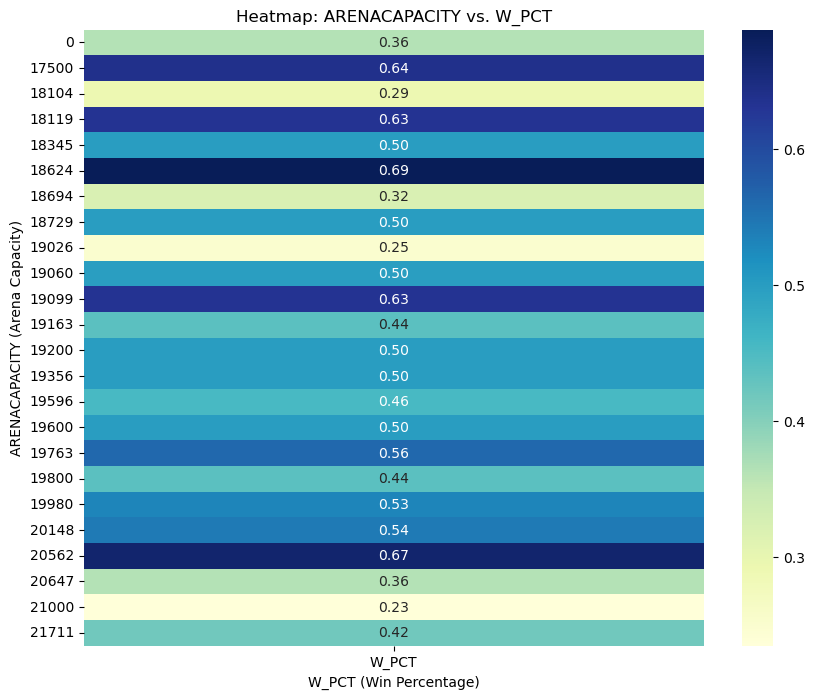

In [153]:
heatmap_data = nba.pivot_table(index='ARENACAPACITY', values='W_PCT', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.title('Heatmap: ARENACAPACITY vs. W_PCT')
plt.xlabel('W_PCT (Win Percentage)')
plt.ylabel('ARENACAPACITY (Arena Capacity)')
plt.show()

[Explore findings]

## Hypothesis Refinement 

[Write this ]